In [ ]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [ ]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit, GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import mean_squared_error, classification_report
from IPython.display import display
from sklearn.pipeline import make_pipeline, Pipeline
from IPython.display import display_html
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import sklearn
print(sklearn.__version__)

1.0.2


### Область работы 2 (поиск  модели .... )

In [47]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'wine_train.csv' # содержит только имя файла, без имен папок !!!

In [48]:
df = pd.read_csv(path_train)
df['quality'] = np.where(df['quality']>=7,1,0) # если качество >= 7, то 1, иначе 0
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,1
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,1
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,0
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,1
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']), df.quality, random_state = 42)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
755,7.8,0.20,0.28,10.2,0.054,78.0,186.0,0.99700,3.14,0.46,10.0
588,6.5,0.22,0.25,17.1,0.050,44.0,138.0,1.00010,3.30,0.37,8.8
585,9.8,0.36,0.46,10.5,0.038,4.0,83.0,0.99560,2.89,0.30,10.1
1329,7.0,0.46,0.39,6.2,0.039,46.0,163.0,0.99280,3.21,0.35,12.2
973,6.6,0.20,0.38,7.9,0.052,30.0,145.0,0.99470,3.32,0.56,11.0
...,...,...,...,...,...,...,...,...,...,...,...
1130,7.1,0.28,0.31,1.5,0.053,20.0,98.0,0.99069,3.15,0.50,11.4
1294,6.4,0.41,0.24,14.0,0.048,24.0,113.0,0.99820,3.44,0.53,9.8
860,6.8,0.38,0.29,9.9,0.037,40.0,146.0,0.99326,3.11,0.37,11.5
1459,9.2,0.19,0.42,2.0,0.047,16.0,104.0,0.99517,3.09,0.66,10.0


In [50]:
# k-ближайшие соседи

In [51]:
knn = KNeighborsClassifier(n_neighbors = 13, p=1, weights='distance')
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7129629629629629


In [52]:
# Путь(название) к файлу(ам) (запрещено изменять)
path_train = 'wine_train.csv'
path_test  = 'wine_test.csv'
# чтение файлов (разрещается использовать только указанные ранее пути)
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
df_test.shape 

(576, 11)

In [53]:
# выбираем наилучшее значение соседей
neighbors = np.arange(1, 100)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Ищем наибольшее значение точности теста
best_neighbor = max(test_accuracies, key=test_accuracies.get)
best_test_accuracy = test_accuracies[best_neighbor]
print(f"Наилучшее количество соседей {best_neighbor} с точностью теста {best_test_accuracy:.2f}")

Наилучшее количество соседей 13 с точностью теста 0.71


In [54]:
# логистическая регрессия

In [55]:

clf = LogisticRegression(random_state=42, penalty='none').fit(X_train, y_train)

clf.predict(X_test)
clf.score(X_test, y_test)

/Users/natalakudrinskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7638888888888888

In [56]:
clf = LogisticRegression(random_state=42, penalty='l2').fit(X_train, y_train)

clf.predict(X_test)
clf.score(X_test, y_test)
# стало хуже

/Users/natalakudrinskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7384259259259259

In [57]:
# выбираем лучший вариант для penalty
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling,'clf__penalty': ['none'], 
         'clf__solver': ['lbfgs','newton-cg']}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid    

/Users/natalakudrinskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/natalakudrinskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/natalakudrinskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/natalakudrinskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/natalakudrinskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['l1'], 'clf__solver': ['liblinear'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['none'],
                          'clf__solver': ['lbfgs', 'newton-cg'],
                          'preprocessing': [MinMaxSc

In [58]:
# строим датафрейм для наглядности
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,2,6,10,14,18,24,25,26,28,29,...,12,16,20,27,23,3,7,15,19,11
mean_fit_time,0.018024,0.040014,0.007605,0.035491,0.030658,0.037399,0.046725,0.028196,0.043733,0.031095,...,0.009121,0.010906,0.037723,0.045529,0.018623,0.010825,0.028779,0.008707,0.008293,0.005296
std_fit_time,0.000889,0.028421,0.000158,0.01684,0.011843,0.010203,0.026444,0.009927,0.01774,0.019782,...,0.00227,0.003175,0.012259,0.010841,0.004185,0.000912,0.008409,0.000809,0.000638,0.001378
mean_score_time,0.001877,0.007144,0.001674,0.001907,0.002288,0.002216,0.003864,0.002448,0.003722,0.003029,...,0.002808,0.00306,0.003187,0.002419,0.002906,0.002194,0.003317,0.002132,0.002023,0.001957
std_score_time,0.000149,0.005469,0.000069,0.000358,0.000573,0.000735,0.002329,0.000508,0.002204,0.001731,...,0.001381,0.002166,0.001346,0.000597,0.001535,0.000397,0.001399,0.000362,0.000364,0.000423
param_clf__penalty,l2,l2,l2,l2,l2,none,none,none,none,none,...,l2,l2,l1,none,l1,l2,l2,l2,l2,l2
param_clf__solver,newton-cg,lbfgs,liblinear,sag,saga,lbfgs,lbfgs,lbfgs,newton-cg,newton-cg,...,sag,saga,liblinear,lbfgs,liblinear,newton-cg,lbfgs,sag,saga,liblinear
param_preprocessing,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...",...,"{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'libline..."
split0_test_score,0.739691,0.739691,0.739691,0.739691,0.739691,0.737113,0.737113,0.737113,0.737113,0.737113,...,0.744845,0.744845,0.739691,0.721649,0.641753,0.64433,0.64433,0.64433,0.64433,0.641753
split1_test_score,0.783505,0.783505,0.783505,0.783505,0.786082,0.783505,0.783505,0.783505,0.783505,0.783505,...,0.780928,0.780928,0.778351,0.757732,0.628866,0.626289,0.626289,0.626289,0.626289,0.623711


<AxesSubplot:>

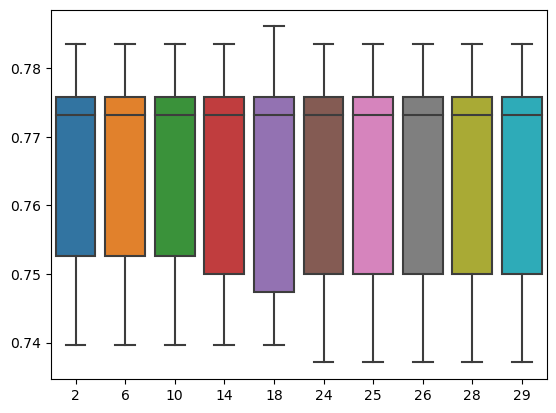

In [59]:
# строим боксплот для наглядности
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl)

In [60]:
# выбираем лучшую
pipe = make_pipeline(StandardScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'none') )
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       286
           1       0.64      0.58      0.61       146

    accuracy                           0.75       432
   macro avg       0.72      0.71      0.71       432
weighted avg       0.75      0.75      0.75       432



In [61]:
# Наивный Байес

In [62]:
print(grid.best_estimator_)

Pipeline(steps=[('preprocessing', RobustScaler()),
                ('clf', LogisticRegression(solver='newton-cg'))])


In [63]:
# строим модель
pipe_best = Pipeline(steps=[('preprocessing', Normalizer()), ('clf', GaussianNB())])
pipe_best.fit(X_train,y_train)
y_best = pipe_best.predict(X_test)

print(classification_report(y_test, y_best))

              precision    recall  f1-score   support

           0       0.85      0.50      0.63       286
           1       0.46      0.83      0.59       146

    accuracy                           0.61       432
   macro avg       0.65      0.66      0.61       432
weighted avg       0.72      0.61      0.61       432



In [64]:
# сравним все 3

In [65]:
model_NB = make_pipeline(Normalizer(),GaussianNB())
model_LR = make_pipeline(StandardScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'none'))
model_KNN = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 13, p=1, weights = 'distance'))

model_NB.fit(X_train,y_train)
model_LR.fit(X_train,y_train)
model_KNN.fit(X_train,y_train)

y_NB_pred = model_NB.predict(X_test)
y_LR_pred = model_LR.predict(X_test)
y_KNN_pred = model_KNN.predict(X_test)

In [66]:
df1 = pd.DataFrame(classification_report(y_test, y_NB_pred, output_dict=True)).T
df2 = pd.DataFrame(classification_report(y_test, y_LR_pred, output_dict=True)).T
df3 = pd.DataFrame(classification_report(y_test, y_KNN_pred, output_dict=True)).T

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('GaussianNB')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('LogisticRegression')
df3_styler = df3.style.set_table_attributes("style='display:inline'").set_caption('KNN')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)
# лучшая точность у knn

,precision,recall,f1-score,support
0,0.850299,0.496503,0.626932,286.000000
1,0.456604,0.828767,0.588808,146.000000
accuracy,0.608796,0.608796,0.608796,0.608796
macro avg,0.653452,0.662635,0.607870,432.000000
weighted avg,0.717245,0.608796,0.614047,432.000000
,precision,recall,f1-score,support
0,0.796667,0.835664,0.815700,286.000000
1,0.643939,0.582192,0.611511,146.000000
accuracy,0.750000,0.750000,0.750000,0.750000
macro avg,0.720303,0.708928,0.713605,432.000000
